In [22]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1771: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [23]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [24]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/Fliprobo image classification/Images/Train'
valid_path = '/content/drive/MyDrive/Dataset/Fliprobo image classification/Images/Test'

In [25]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [26]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [27]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/Fliprobo image classification/Images/Train/*')

In [28]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [29]:
prediction = Dense(len(folders), activation='softmax')(x)

In [30]:
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [31]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [32]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [33]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Fliprobo image classification/Images/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 924 images belonging to 3 classes.


In [35]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Fliprobo image classification/Images/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 276 images belonging to 3 classes.


In [36]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
29/29 [==============================] - 305s 10s/step - loss: 1.3135 - accuracy: 0.9048 - val_loss: 0.1202 - val_accuracy: 0.9855
Epoch 2/10
29/29 [==============================] - 133s 5s/step - loss: 0.0943 - accuracy: 0.9913 - val_loss: 0.4641 - val_accuracy: 0.9710
Epoch 3/10
29/29 [==============================] - 133s 5s/step - loss: 0.0499 - accuracy: 0.9924 - val_loss: 0.2020 - val_accuracy: 0.9819
Epoch 4/10
29/29 [==============================] - 133s 5s/step - loss: 0.0656 - accuracy: 0.9935 - val_loss: 0.1412 - val_accuracy: 0.9891
Epoch 5/10
29/29 [==============================] - 133s 5s/step - loss: 0.0302 - accuracy: 0.9946 - val_loss: 0.0388 - val_accuracy: 0.9928
Epoch 6/10
29/29 [==============================] - 133s 5s/step - loss: 0.0188 - accuracy: 0.9957 - val_loss: 0.2050 - val_accuracy: 0.9855
Epoch 7/10
29/29 [==============================] - 133s 5s/step - loss: 0.0164 - accuracy: 0.9978 - val_loss: 0.1692 - val_accuracy: 0.9855
Epoch 8/10
2

In [37]:
import matplotlib.pyplot as plt

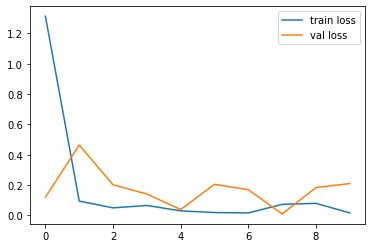

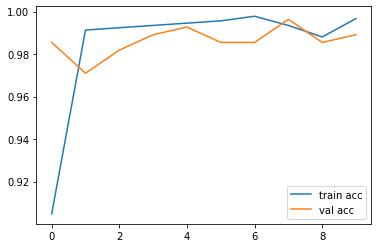

<Figure size 432x288 with 0 Axes>

In [38]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [39]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [40]:
y_pred = model.predict(test_set)

In [41]:
y_pred

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.85968624e-30, 0.00000000e+00, 1.00000000e+00],
       [3.72874828e-26, 1.00000000e+00, 7.42674941e-16],
       [0.00000000e+00, 1.00000000e+00, 1.15818588e-29],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 2.62653210e-29],
       [5.78527639e-18, 2.15046590e-18, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.02800419e-25, 1.00000000e+00, 4.32398650e-08],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.59516990e-37, 1.00000000e+00, 9.53968582e-19],
       [1.00000000e+00, 0.00000000e+00, 9.86336302e-35],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000

In [42]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [43]:
y_pred

array([1, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 0, 2,
       1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 2,
       2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1,
       1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1,
       0, 2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1,
       1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2])

In [44]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [46]:
model=load_model('model_inception.h5')

In [47]:
img=image.load_img('/content/drive/MyDrive/Dataset/Fliprobo image classification/Images/Test/Saree/51YxR1jlkyL._AC_UL320_.jpg',target_size=(224,224))

In [48]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [49]:
x.shape

(224, 224, 3)

In [50]:
x=x/255

In [51]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [52]:
img_data

array([[[[-0.99215686, -0.99215686, -0.99215686],
         [-0.99215686, -0.99215686, -0.99215686],
         [-0.99215686, -0.99215686, -0.99215686],
         ...,
         [-0.99215686, -0.99215686, -0.99215686],
         [-0.99215686, -0.99215686, -0.99215686],
         [-0.99215686, -0.99215686, -0.99215686]],

        [[-0.99215686, -0.99215686, -0.99215686],
         [-0.99215686, -0.99215686, -0.99215686],
         [-0.99215686, -0.99215686, -0.99215686],
         ...,
         [-0.99215686, -0.99215686, -0.99215686],
         [-0.99215686, -0.99215686, -0.99215686],
         [-0.99215686, -0.99215686, -0.99215686]],

        [[-0.99215686, -0.99215686, -0.99215686],
         [-0.99215686, -0.99215686, -0.99215686],
         [-0.99215686, -0.99215686, -0.99215686],
         ...,
         [-0.99215686, -0.99215686, -0.99215686],
         [-0.99215686, -0.99215686, -0.99215686],
         [-0.99215686, -0.99215686, -0.99215686]],

        ...,

        [[-0.99215686, -0.99215686, -0

In [53]:
model.predict(img_data)

array([[0.00838048, 0.87487537, 0.11674409]], dtype=float32)

In [55]:
a=np.argmax(model.predict(img_data), axis=1)

In [56]:
a==1

array([ True])